# A primer on JWST Guide Star data
----

**Author:** Néstor Espinoza (nespinoza@stsci.edu) | 
**Last update:** June 6, 2023

Let's begin by loading some neat and useful libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('ticks')

from jwst import datamodels

### 1. A gentle introduction to FGS and its data

All right, first of all, let's see what files we have at our disposal. When you download data, there are _a lot_ of files. However, we will simplify our analyses by just working with the `*_cal.fits` files (if you want to know why --- ask me) --- which is still a lot:

In [4]:
ls data/01541/obsnum01/*_cal.fits

data/01541/obsnum01/jw01541001001_gs-acq1_2022159061247_cal.fits
data/01541/obsnum01/jw01541001001_gs-acq1_2022159061334_cal.fits
data/01541/obsnum01/jw01541001001_gs-acq2_2022159061249_cal.fits
data/01541/obsnum01/jw01541001001_gs-acq2_2022159061336_cal.fits
data/01541/obsnum01/jw01541001001_gs-fg_2022159061621_cal.fits
data/01541/obsnum01/jw01541001001_gs-fg_2022159062424_cal.fits
data/01541/obsnum01/jw01541001001_gs-fg_2022159132423-seg001_cal.fits
data/01541/obsnum01/jw01541001001_gs-fg_2022159132423-seg002_cal.fits
data/01541/obsnum01/jw01541001001_gs-fg_2022159132423-seg003_cal.fits
data/01541/obsnum01/jw01541001001_gs-fg_2022159132423-seg004_cal.fits
data/01541/obsnum01/jw01541001001_gs-fg_2022159132423-seg005_cal.fits
data/01541/obsnum01/jw01541001001_gs-fg_2022159132423-seg006_cal.fits
data/01541/obsnum01/jw01541001001_gs-fg_2022159132423-seg007_cal.fits
data/01541/obsnum01/jw01541001001_gs-fg_2022159132423-seg008_cal.fits
data/01541/obsnum01/jw01541001001_gs-id_1_image_cal.fi

I know this seems confusing, but don't despair.

A primer of what everything means can be found [here](https://jwst-pipeline.readthedocs.io/en/latest/jwst/data_products/guidestar_products.html), and an explaination of why all those files actually _exist_ can be found [here](https://jwst-docs.stsci.edu/jwst-observatory-hardware/jwst-fine-guidance-sensor). 

In essence, those documents try to explain the guidestar process for JWST, which is composed of 4 main software functions, which are ran in order: "Identification", "Acquisition", "Track" and "Fine guide". Let's go through them:

#### 1.1 The Identification function
When the observatory moves to a target, it first takes an "identification" exposure in order to figure out if we are, indeed, on the correct region of the sky --- this is called the **Identification** function (or frame) of the FGS operation process. The files are indicated by `*gs-id*` --- let's take a look at the stacked image: 

In [5]:
image_id = datamodels.open('data/01541/obsnum01/jw01541001001_gs-id_1_stacked_cal.fits')

In [6]:
image_id.shape

(1, 2048, 2304)

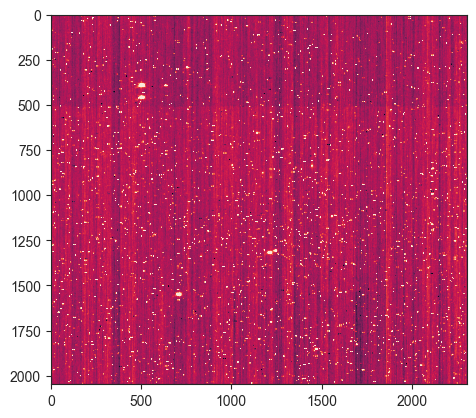

In [7]:
im = plt.imshow(image_id.data[0, :, :])
im.set_clim(-100,100)

Neat. You see those little points? One of those is our little guide star. Don't worry about the striping on the frame --- that's a known (1/f) noise pattern. 

#### 1.2 The Acquisition function

With the frame above, the software now has a good idea of where the target guidestar is. Next, the observatory executes the "acquisition" function, which are the files labelled as `acq1` and `acq2` (yes, there are two acquisition frames).

The first acquistion frame performs an observation using a subarray around the guidestar of 6 integrations on 128 x 128 pixels:

In [42]:
acq1 = datamodels.open('data/01541/obsnum01/jw01541001001_gs-acq1_2022159061247_cal.fits')

In [43]:
acq1.data.shape

(6, 128, 128)

Let's plot each integration:

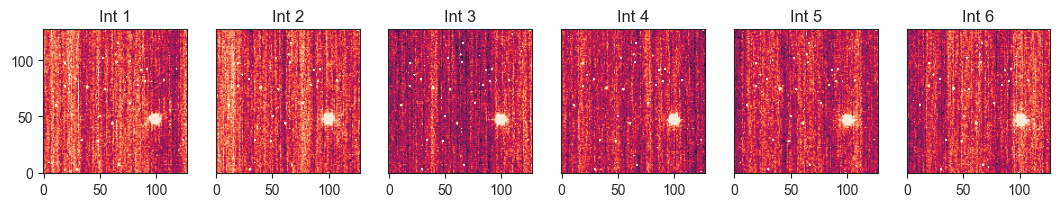

In [44]:
plt.figure(figsize = (13,2))
for i in range(acq1.data.shape[0]):
    
    plt.subplot(160 + (i+1))
    im = plt.imshow(acq1.data[i, :, :], origin = 'lower')
    im.set_clim(-100,100)
    plt.title('Int '+str(i+1))
    
    if i != 0:
        
        plt.yticks([])

Now the average integration:

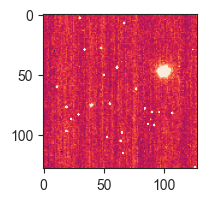

In [45]:
plt.figure(figsize = (13,2))
im = plt.imshow(np.nanmedian(acq1.data, axis = 0))
im.set_clim(-100,100)

Next up, the function takes _another_ set of frames, but on a smaller, 32x32 pixel subarray:

In [46]:
acq2 = datamodels.open('data/01541/obsnum01/jw01541001001_gs-acq2_2022159061249_cal.fits')

In [47]:
acq2.data.shape

(5, 32, 32)

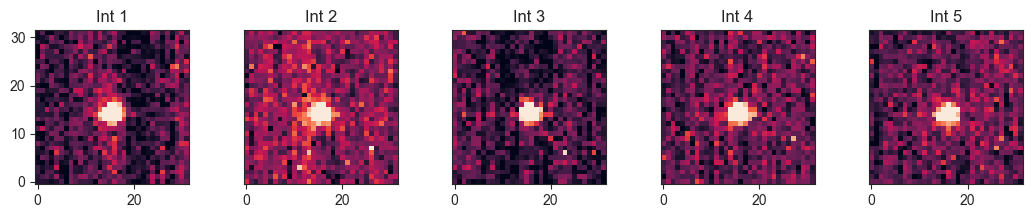

In [53]:
plt.figure(figsize = (13,2))
for i in range(acq2.data.shape[0]):
    
    plt.subplot(150 + (i+1))
    im = plt.imshow(acq2.data[i, :, :], origin = 'lower')
    im.set_clim(-300,1000)
    plt.title('Int '+str(i+1))
    
    if i != 0:
        
        plt.yticks([])

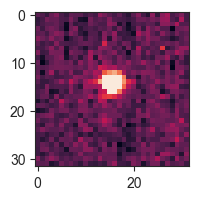

In [54]:
plt.figure(figsize = (13,2))
im = plt.imshow(np.nanmedian(acq2.data, axis = 0))
im.set_clim(-300,1000)

You might note that there are _two_ sets of `acq1` and `acq2` files. My hunch is that the guidestar was not as centered as it could, so a new set of `acq1` and `acq2` files were obtained:

In [55]:
acq1 = datamodels.open('data/01541/obsnum01/jw01541001001_gs-acq1_2022159061334_cal.fits')

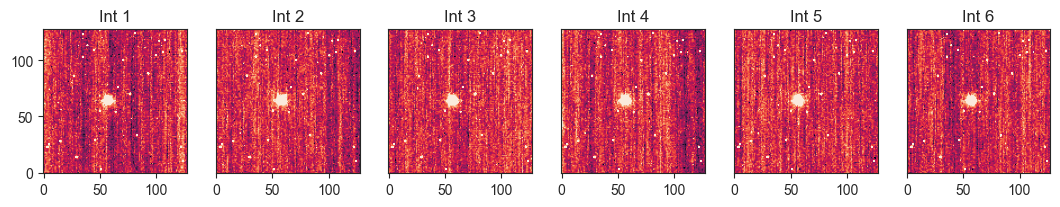

In [56]:
plt.figure(figsize = (13,2))
for i in range(acq1.data.shape[0]):
    
    plt.subplot(160 + (i+1))
    im = plt.imshow(acq1.data[i, :, :], origin = 'lower')
    im.set_clim(-100,100)
    plt.title('Int '+str(i+1))
    
    if i != 0:
        
        plt.yticks([])

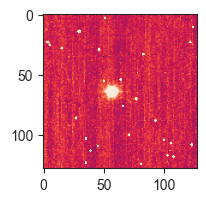

In [57]:
plt.figure(figsize = (13,2))
im = plt.imshow(np.nanmedian(acq1.data, axis = 0))
im.set_clim(-100,100)

In [58]:
acq2 = datamodels.open('data/01541/obsnum01/jw01541001001_gs-acq2_2022159061336_cal.fits')

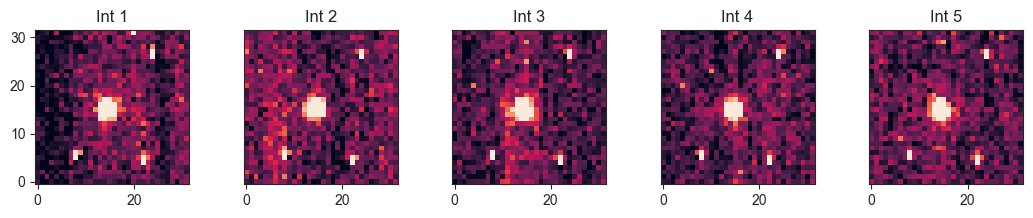

In [59]:
plt.figure(figsize = (13,2))
for i in range(acq2.data.shape[0]):
    
    plt.subplot(150 + (i+1))
    im = plt.imshow(acq2.data[i, :, :], origin = 'lower')
    im.set_clim(-300,1000)
    plt.title('Int '+str(i+1))
    
    if i != 0:
        
        plt.yticks([])

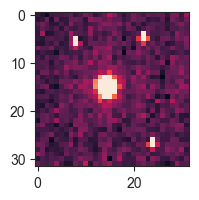

In [60]:
plt.figure(figsize = (13,2))
im = plt.imshow(np.nanmedian(acq2.data, axis = 0))
im.set_clim(-300,1000)

Neat! That looks _much_ better centered. This likely happened _after_ ACS commanded corrective maneuvers --- but don't take my word for it. Better to double check if this was the case with someone with better expertise. 

This brings us to the...

#### 1.3 The Track function

Once all is good to go, the FGS places the star in a 32x32 subarray on the expected position of the guide star. This starts a loop between ACS and FGS on which ACS centers the star to within ~0.06'' from the desired location. Let's look at the first track exposure:

In [61]:
track1 = datamodels.open('data/01541/obsnum01/jw01541001001_gs-track_2022159061423_cal.fits')

In [62]:
track1.data.shape

(192, 32, 32)

Text(0.5, 1.0, 'First integration of first file')

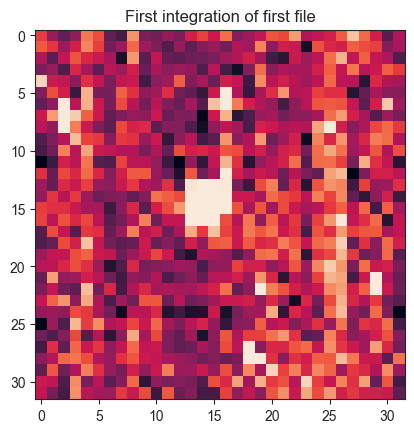

In [74]:
im = plt.imshow(track1.data[0,:,:])
im.set_clim(-1000,1000)
plt.title('First integration of first file')

In [91]:
track4 = datamodels.open('data/01541/obsnum01/jw01541001001_gs-track_2022159062509_cal.fits')

In [92]:
track4.data.shape

(192, 32, 32)

Text(0.5, 1.0, 'First integration of last file')

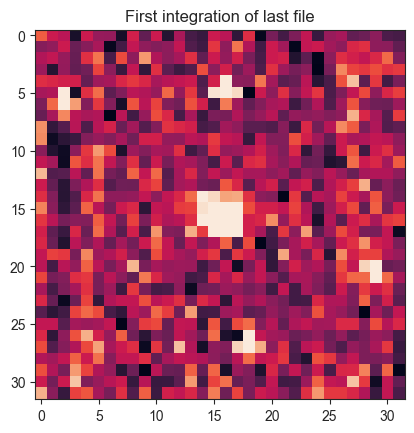

In [93]:
im = plt.imshow(track4.data[0,:,:])
im.set_clim(-1000,1000)
plt.title('First integration of last file')

Text(0.5, 1.0, 'Last integration of last file')

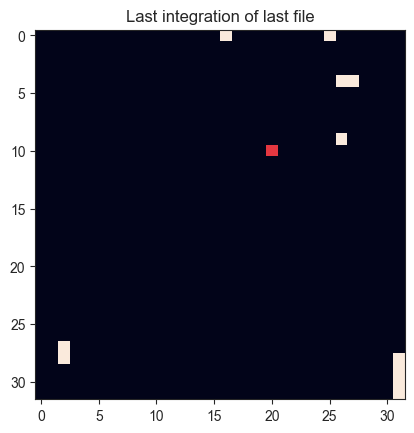

In [95]:
im = plt.imshow(track4.data[-1,:,:])
im.set_clim(-1000,1000)
plt.title('Last integration of last file')

That brings us to...

#### 1.4 The Fine Guide function

This is the function that basically locks on the star. This is performed on a very small subarray (8x8), and because is _so_ large, it's segmented in our case in 8 segments. Let's open the first one to familiarize ourselves with these files:

In [96]:
fg1 = datamodels.open('data/01541/obsnum01/jw01541001001_gs-fg_2022159132423-seg001_cal.fits')

In [97]:
fg1.data.shape

(51200, 8, 8)

Phew --- 51,200 integrations only on the first segment! That's _a lot_ of data. How does each integration looks like?

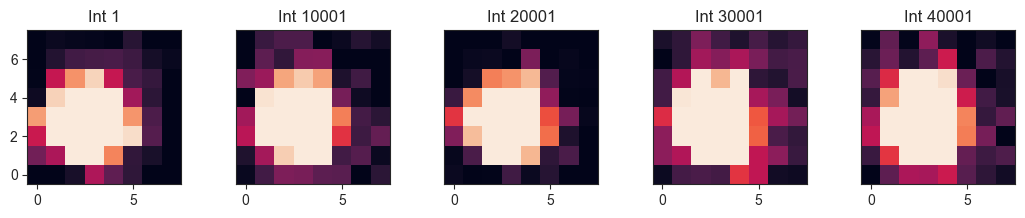

In [104]:
plt.figure(figsize = (13,2))
for i in range(5):
    
    plt.subplot(150 + (i+1))
    im = plt.imshow(fg1.data[i*10000, :, :], origin = 'lower')
    im.set_clim(0,1000)
    plt.title('Int '+str(i*10000+1))
    
    if i != 0:
        
        plt.yticks([])

Ah, so there _is_ some stuff happening on the PSF apparently --- it is not as steady as one would think (doing a movie would be cool...). 

All right; let's add the flux of this first segment of data to see how it looks like:

In [109]:
flux_sum = np.nansum( fg1.data, axis = (1,2) )

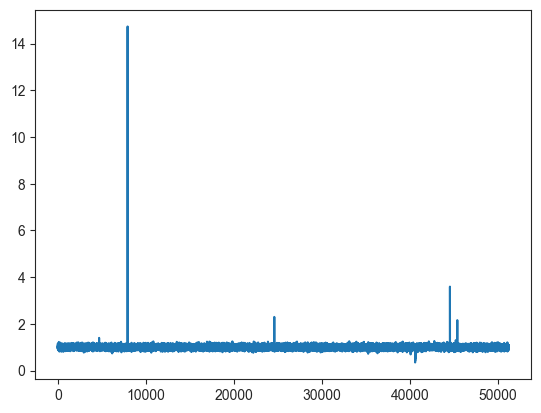

In [111]:
plt.plot(flux_sum / np.nanmedian(flux_sum))

There are some outliers, so let's perform a close-up:

(0.0, 51200.0)

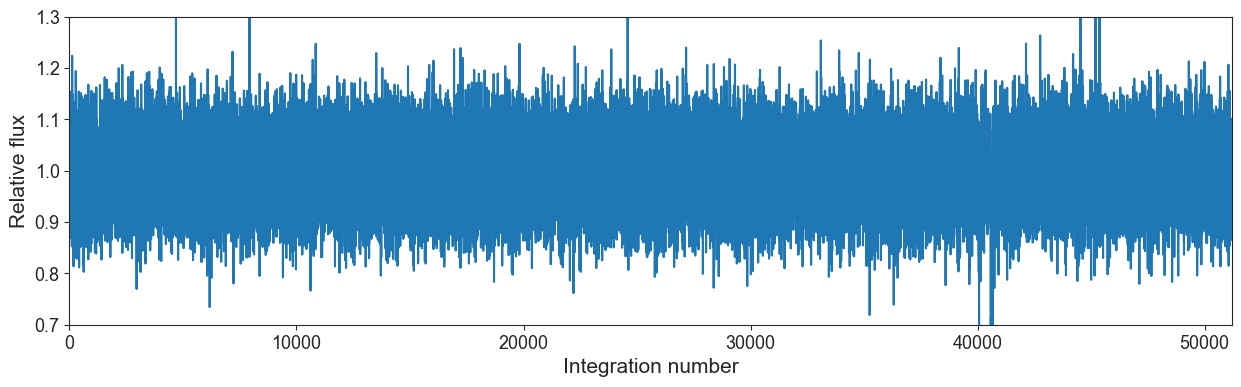

In [118]:
plt.figure(figsize=(15,4))

plt.plot(flux_sum / np.nanmedian(flux_sum))
plt.ylim(0.7,1.3)

plt.ylabel('Relative flux', fontsize = 15)
plt.xlabel('Integration number', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlim(0, len(flux_sum))

This is actually pretty awesome considering the integration time is...

In [131]:
dt = (fg1.meta.guidestar.data_end - fg1.meta.guidestar.data_start) 

In [134]:
time_per_integration = (dt*24*3600.) / 51200
print(time_per_integration)

0.06399994139974297


0.064 seconds (i.e., 64 ms)! (in theory, we could do a factor of ~8 better if we worked at the group level --- but this is amazing enough already). Let's bin the data so we can have 20-second cadence (a-la-TESS):

In [145]:
def bin_data(x, y, n_bin):
    
    # Stolen from juliet: https://github.com/nespinoza/juliet/blob/master/juliet/utils.py
    x_bins = []
    y_bins = []
    y_err_bins = []
    for i in range(0, len(x), n_bin):
        x_bins.append(np.median(x[i:i + n_bin - 1]))
        y_bins.append(np.median(y[i:i + n_bin - 1]))
        y_err_bins.append(
            np.sqrt(np.var(y[i:i + n_bin - 1])) /
            np.sqrt(len(y[i:i + n_bin - 1])))
    return np.array(x_bins), np.array(y_bins), np.array(y_err_bins)

In [146]:
tstart = np.arange(len(flux_sum))*time_per_integration

tbin, ybin, ybinerr = bin_data(tstart, flux_sum / np.nanmedian(flux_sum), n_bin = 314)

(0.0, 3276.73299972544)

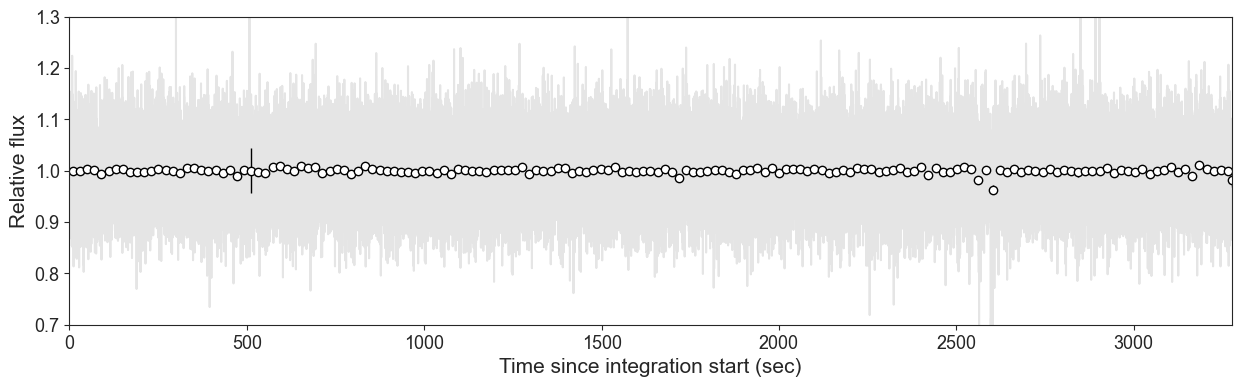

In [147]:
plt.figure(figsize=(15,4))

plt.plot(tstart, flux_sum / np.nanmedian(flux_sum), color = 'black', alpha = 0.1)
plt.errorbar(tbin, ybin, ybinerr, fmt = 'o', 
             mfc = 'white', mec = 'black', ecolor = 'black', elinewidth = 1)
plt.ylim(0.7,1.3)

plt.ylabel('Relative flux', fontsize = 15)
plt.xlabel('Time since integration start (sec)', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlim(0, np.max(tstart))

(0.0, 3276.73299972544)

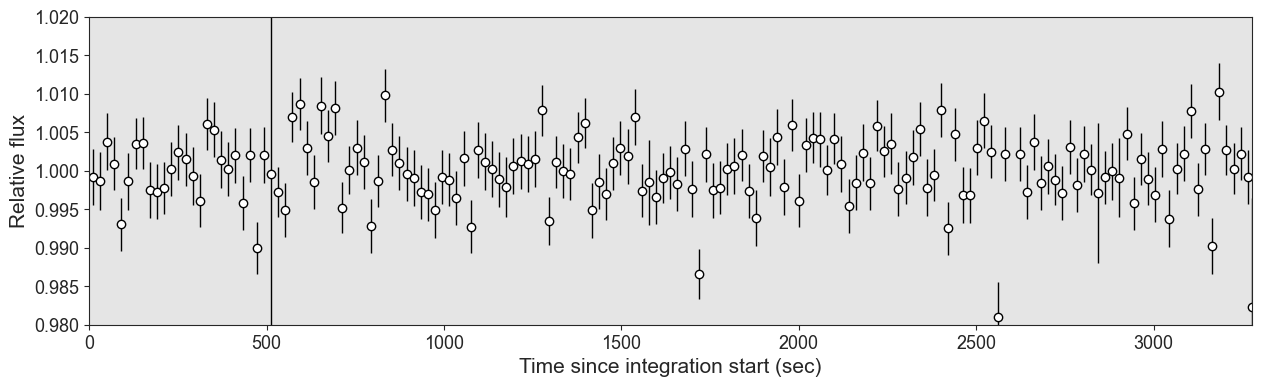

In [148]:
plt.figure(figsize=(15,4))

plt.plot(tstart, flux_sum / np.nanmedian(flux_sum), color = 'black', alpha = 0.1)
plt.errorbar(tbin, ybin, ybinerr, fmt = 'o', 
             mfc = 'white', mec = 'black', ecolor = 'black', elinewidth = 1)
plt.ylim(0.98,1.02)

plt.ylabel('Relative flux', fontsize = 15)
plt.xlabel('Time since integration start (sec)', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlim(0, np.max(tstart))

(0.0, 0.9102036110348445)

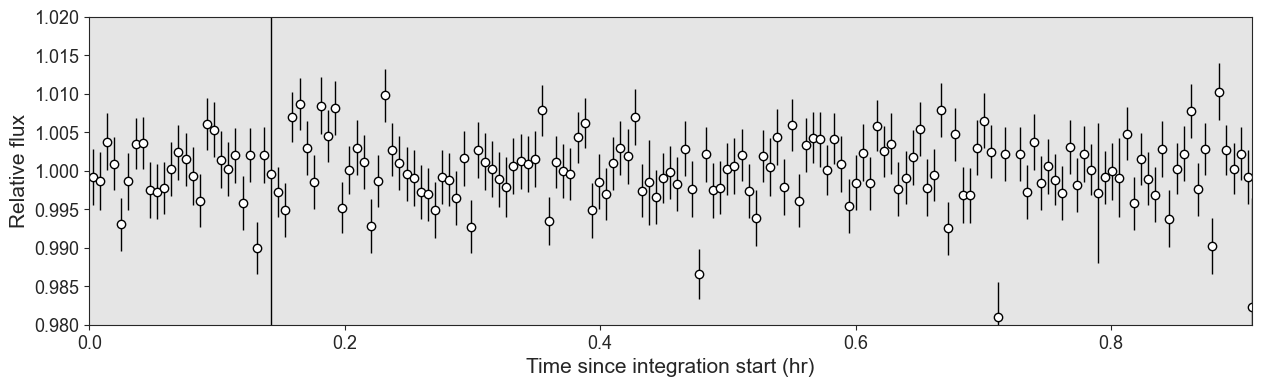

In [150]:
plt.figure(figsize=(15,4))

plt.plot(tstart/3600., flux_sum / np.nanmedian(flux_sum), color = 'black', alpha = 0.1)
plt.errorbar(tbin/3600., ybin, ybinerr, fmt = 'o', 
             mfc = 'white', mec = 'black', ecolor = 'black', elinewidth = 1)
plt.ylim(0.98,1.02)

plt.ylabel('Relative flux', fontsize = 15)
plt.xlabel('Time since integration start (hr)', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlim(0, np.max(tstart/3600.))

This is an insane photometric precision given the cadence and the minimal ammount of work to perform this analysis:

In [152]:
print(np.nanmedian(ybinerr)*1e6,'ppm per 20 seconds')

3515.618185319148 ppm per 20 seconds


In [157]:
fg1.search('mag')

root (AsdfObject)
└─meta (dict)
  └─guidestar (dict)
    ├─gs_mag (float): 16.10727310180664
    └─gs_umag (float): 0.05539418011903763

As a comparison, the TESS scatter is about ~60 times larger than this for a 16 magnitude star such as this one ([see Figure 2 here](https://ui.adsabs.harvard.edu/abs/2022AJ....163...79H/abstract)) --- which makes sense with the $D_{JWST}/D_{TESS}$ which is about ~60 too.